In [1]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk




print(tf.test.gpu_device_name())
print(tf.config.list_physical_devices('GPU'))
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Init Graph Optimizer
Init Kernel
/device:GPU:0Metal device set to: Apple M1

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.7 | packaged by conda-forge | (default, Sep  2 2021, 17:55:16) 
[Clang 11.1.0 ]
Pandas 1.3.2
Scikit-Learn 0.24.2
GPU is available


2021-09-17 22:48:01.807564: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-17 22:48:01.807934: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
p=Path('Train/images')
d=p.glob("*")
img_data=[]
labels=[]
for image_path in d:
    
    a=str(image_path).split("/")[2:]
    print(a)
    w=[new_a.split(".") for new_a in a ]
    image_number=int(w[0][0])
    img=image.load_img(image_path,target_size=(40,40))
    image_arr=image.img_to_array(img)
    img_data.append(image_arr)
    
    if image_number>=296 and image_number<=396:
        
        labels.append(0) #pikachu
    if image_number>=397 and image_number<=497:
        
        labels.append(1) #bulbasaur
    if image_number>=498 and image_number<=620:
        
        labels.append(2) #charmendae
  
  
       


['604.jpg']
['610.jpg']
['348.jpg']
['360.jpg']
['406.jpg']
['412.jpg']
['374.jpg']
['599.jpg']
['572.jpg']
['566.jpg']
['567.jpg']
['573.jpg']
['598.jpg']
['413.jpg']
['375.jpg']
['361.jpg']
['407.jpg']
['349.jpg']
['611.jpg']
['605.jpg']
['613.jpg']
['607.jpg']
['388.jpg']
['439.jpg']
['377.jpg']
['411.jpg']
['405.jpg']
['363.jpg']
['559.jpg']
['565.jpg']
['571.jpg']
['570.jpg']
['564.jpg']
['558.jpg']
['404.jpg']
['362.jpg']
['376.jpg']
['410.jpg']
['438.jpg']
['389.jpg']
['606.jpg']
['612.jpg']
['616.jpg']
['602.jpg']
['399.jpg']
['414.jpg']
['372.jpg']
['366.jpg']
['400.jpg']
['428.jpg']
['560.jpg']
['574.jpg']
['548.jpg']
['549.jpg']
['575.jpg']
['561.jpg']
['429.jpg']
['367.jpg']
['401.jpg']
['415.jpg']
['373.jpg']
['398.jpg']
['603.jpg']
['617.jpg']
['601.jpg']
['615.jpg']
['403.jpg']
['365.jpg']
['371.jpg']
['417.jpg']
['359.jpg']
['588.jpg']
['577.jpg']
['563.jpg']
['562.jpg']
['576.jpg']
['589.jpg']
['358.jpg']
['370.jpg']
['416.jpg']
['402.jpg']
['364.jpg']
['614.jpg']
['60

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


['324.jpg']
['318.jpg']
['522.jpg']
['536.jpg']
['537.jpg']
['523.jpg']
['319.jpg']
['443.jpg']
['325.jpg']
['331.jpg']
['457.jpg']
['480.jpg']
['494.jpg']
['482.jpg']
['496.jpg']
['327.jpg']
['441.jpg']
['455.jpg']
['333.jpg']
['469.jpg']
['535.jpg']
['521.jpg']
['520.jpg']
['534.jpg']
['468.jpg']
['454.jpg']
['332.jpg']
['326.jpg']
['440.jpg']
['497.jpg']
['483.jpg']
['619.jpg']
['382.jpg']
['396.jpg']
['369.jpg']
['341.jpg']
['427.jpg']
['433.jpg']
['355.jpg']
['590.jpg']
['584.jpg']
['553.jpg']
['547.jpg']
['546.jpg']
['552.jpg']
['585.jpg']
['591.jpg']
['432.jpg']
['354.jpg']
['340.jpg']
['426.jpg']
['368.jpg']
['397.jpg']
['383.jpg']
['618.jpg']
['395.jpg']
['381.jpg']
['418.jpg']
['356.jpg']
['430.jpg']
['424.jpg']
['342.jpg']
['587.jpg']
['593.jpg']
['578.jpg']
['544.jpg']
['550.jpg']
['551.jpg']
['545.jpg']
['579.jpg']
['592.jpg']
['586.jpg']
['425.jpg']
['343.jpg']
['357.jpg']
['431.jpg']
['419.jpg']
['380.jpg']
['394.jpg']
['390.jpg']
['384.jpg']
['435.jpg']
['353.jpg']
['34

In [31]:
print(labels)


[2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2]


In [32]:
#convert to numpy
img_data=np.array(img_data,dtype='float32')/255.0
labels=np.array(labels)

print(img_data.shape,labels.shape)

(304, 40, 40, 3) (304,)


In [33]:
#randomly shuffle
import random

combined=list(zip(img_data,labels))
random.shuffle(combined)

img_data[:],labels[:]=zip(*combined)
              

In [34]:
def drawImg(img):
    plt.imshow(img)
    plt.show()
    return

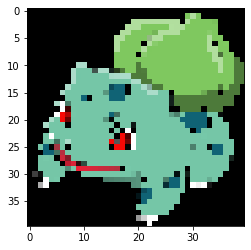

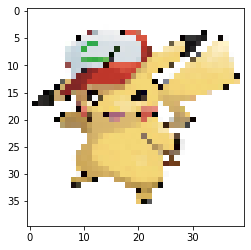

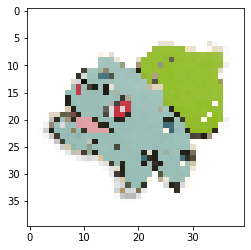

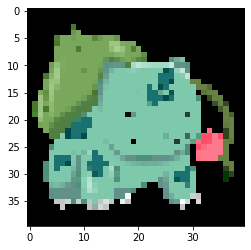

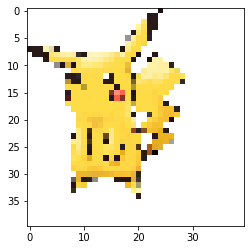

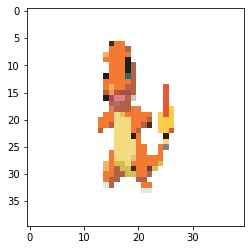

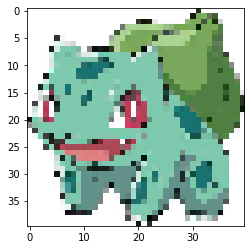

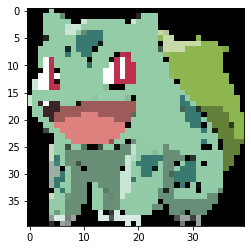

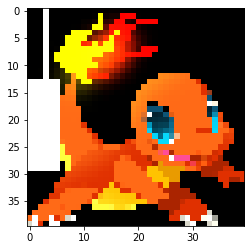

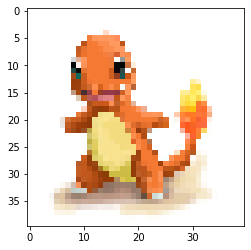

In [35]:
for i in range(10):
    drawImg(img_data[i])

### Convert data for ONE-VS-ONE Classification

In [36]:
img_data.shape

(304, 40, 40, 3)

In [37]:
m=img_data.shape[0]
img_data=img_data.reshape(m,-1)
print(img_data.shape,labels.shape)

(304, 4800) (304,)


In [38]:
dic={}
dic[1]=[]
dic[1].append("a,b,c,d")
dic[1].append("z,l")
dic[2]=[]
dic[2].append("o,d")
print(dic[1][1])
dic[3]={}
dic[3][2]='v'
print(dic)




z,l
{1: ['a,b,c,d', 'z,l'], 2: ['o,d'], 3: {2: 'v'}}


In [39]:
classes=len(np.unique(labels))
print(classes)

3


In [40]:
def divide_data(x,y):
    
    data={}
    
    for i in range(classes):
        data[i]=[]
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k]=np.array(data[k])
        
    return data

        
    
    


In [41]:
data=divide_data(img_data,labels)
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)

(101, 4800)
(101, 4800)
(102, 4800)


In [42]:
def combine_data(d1,d2):
    
    samples = d1.shape[0]+d2.shape[0]
    features= d1.shape[1]
    l1,l2=d1.shape[0],d2.shape[0]
    
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples))
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_labels[:l1]=-1
    data_labels[l1:]=+1
    
    return data_pair,data_labels
    
    

### SVM

In [43]:
class SVM:
  
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

[202.0, 200.94955179022753, 199.89910746482246, 198.8486667766355, 197.7982305867637, 196.74779888537358, 195.6973712636183, 194.64694773330555, 193.59652835464317, 192.54611300739396, 191.49570241262492, 190.44529570822965, 189.39489326427662, 188.34449456324555, 187.2941003653402, 186.2437098834424, 185.19332465460005, 184.36565312912984, 183.91911331861039, 183.79801541320256, 183.55345263809767, 183.4269672526636, 183.13931224162673, 182.93533880579506, 182.7745642304247, 182.5957106799768, 182.35448277975706, 182.16810661148048, 182.04749564491945, 181.78649331675587, 181.70893865570406, 182.10519718280153, 181.22842113391948, 181.04805970913367, 180.91957367396125, 180.67784445371828, 180.5169278466467, 180.33660525888033, 180.13519580256784, 180.01801755404168, 179.9213010224759, 179.60791787759382, 179.5048538509007, 179.3796754772168, 179.24711004550198, 178.98943466167205, 178.76174300780448, 178.60664040450317, 178.48821687976658, 178.28182240750382, 178.21987552252767, 177.

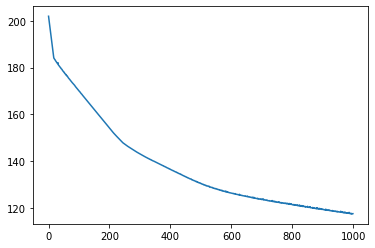

In [60]:
svm=SVM()
xp,yp=combine_data(data[0],data[1])
w,b,loss=svm.fit(xp,yp,learning_rate=0.000001,maxItr=1000)
print(loss)
plt.plot(loss)

In [61]:
def trainSVMs(x,y):
    svm_classifier={}
    for i in range(classes):
        svm_classifier[i]={}
        for j in range(i+1,classes):
            xpair,ypair=combine_data(data[i],data[j])
            wts,b,loss=svm.fit(xpair,ypair,learning_rate=0.000001,maxItr=1000)
            plt.plot(loss)
            svm_classifier[i][j]=(wts,b)
            
    return svm_classifier
        
    

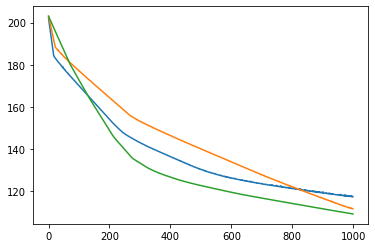

In [62]:
svm_classifier=trainSVMs(img_data,labels)

In [63]:
print(svm_classifier)

{0: {1: (array([[ 0.0013884 ,  0.00063914, -0.0013842 , ...,  0.0010608 ,
        -0.00043853, -0.00342648]]), 0.00766400000000001), 2: (array([[-0.00049662, -0.0016916 , -0.0004834 , ..., -0.00331437,
        -0.00441218, -0.00252314]]), 0.0060300000000000145)}, 1: {2: (array([[-0.00251921, -0.0017612 ,  0.00102499, ..., -0.00403288,
        -0.00225878,  0.00237589]]), -0.003698)}, 2: {}}


In [64]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1
    

In [65]:
def predict(x):
    
    count=np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b=svm_classifier[i][j]
            #take a majority prediction
            z=binaryPredict(x,w,b)
            
            if (z==1):
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    #print(final_prediction)
    return final_prediction

In [66]:
print(predict(img_data[10]))
print(labels[10])


1
1


In [67]:
def accuracy(x,y):
    count=0.0
    for i in range(x.shape[0]):
        pred=predict(x[i])
        if (pred==y[i]):
            count+=1
    return count/x.shape[0]

In [68]:
print(accuracy(img_data,labels))

0.6414473684210527
